## Introduction
Nous réalisons une étude de marché pour une entreprise qui propose des contenus de formation en ligne pour un public de niveau lycée et université. Cette entreprise souhaite se développer à l'étranger et nous devons donc analyser des données sur l’éducation de la banque mondiale pour répondre aux questions suivantes :
- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

In [1]:
# pip install pandas
# pd.__version__
#pip install missingno

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import missingno as msno
import seaborn as sns

## Sommaire <a class="anchor" id="Sommaire"></a>

* [Exploration](#Partie1)
    * [Chargement des données](#Chargement)
    * [Premier fichier](#Fichier1)
    * [Deuxième fichier](#Fichier2)
    * [Troisième fichier](#Fichier3)
    * [Quatrième fichier](#Fichier4)
    * [Cinquième fichier](#Fichier5)
* [Analyse des données](#Partie2)
    * [Sélection des informations pertinentes](#Partie2_1)
    * [Construction du dataset d'étude](#Partie2_2)
* [Choix des pays à fort et bon potentiel](#Partie3)
    * [Pays à fort potentiel](#Partie3_1)
    * [Pays à bon potentiel](#Partie3_2)
* [Evolution des indicateurs](#Partie4)
* [Note annexe](#Note)
    

## Exploration <a class="anchor" id="Partie1"></a>
Nous avons à notre disposition 5 fichiers. Avant de commencer à les nettoyer et les analyser, regardons ce qu'ils contiennent. Pour chacun d'entre eux, nous regarderons :
- la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)

### Chargement des données <a class="anchor" id="Chargement"></a>

In [3]:
df_Country = pd.read_csv('EdStatsCountry.csv', sep=',')
df_CountrySeries = pd.read_csv('EdStatsCountry-Series.csv', sep=',')
df_Data = pd.read_csv('EdStatsData.csv', sep=',')
df_FootNote = pd.read_csv('EdStatsFootNote.csv', sep=',')
df_Series = pd.read_csv('EdStatsSeries.csv', sep=',')

Pour chacun des fichiers, l'exploration consiste à :
- donner le nombre de lignes et le nombre de colonnes (à l'aide de la fonction *shape*)
- donner le nom des variables et leur type (à l'aide de la fonction *info*)
- trouver si il y a des doublons (à l'aide de la fonction *duplicated()*)
- donner le nombre de valeurs manquantes (à l'aide d'histogrammes de complétion)
- regarder ce que contiennent les fichiers (à l'aide de la fonction *head()*)

[Retour au sommaire](#Sommaire)

### EdStatsCountry.csv  <a class="anchor" id="Fichier1"></a>

In [4]:
df_Country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


Ce jeu de données présente des informations (notamment économiques et démographiques) qui concernent les pays de l'étude. Ces données pourront nous être utiles lors de l'analyse.

In [5]:
print("Le dataset Country-Series possède", df_Country.shape[0], "lignes et", df_Country.shape[1], "colonnes.")

Le dataset Country-Series possède 241 lignes et 32 colonnes.


In [6]:
df_Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

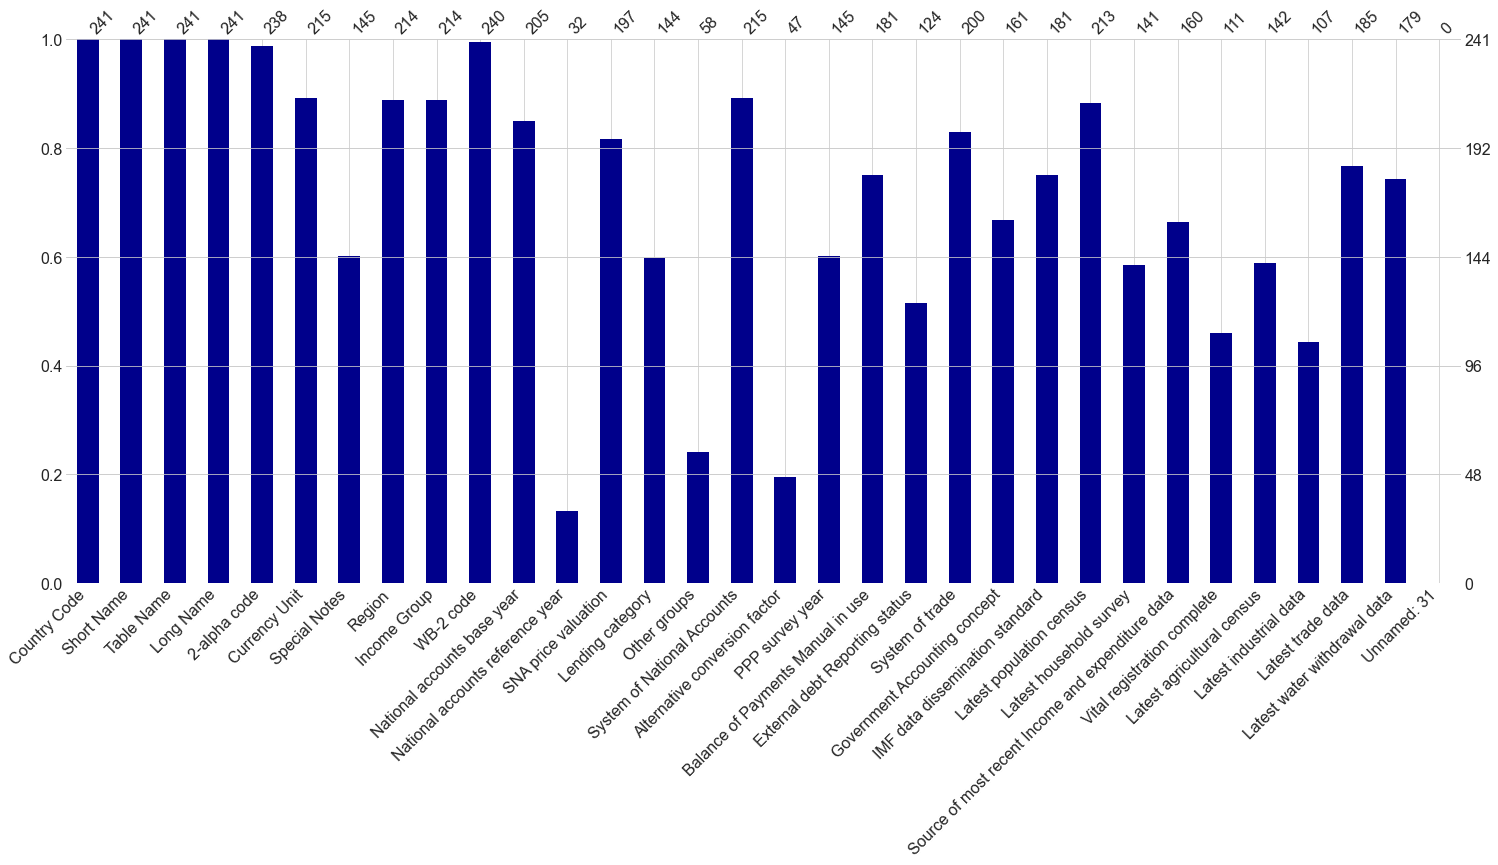

In [7]:
msno.bar(df_Country, color="darkblue")
plt.show()

Ce jeu de données est beaucoup rempli, peu de données sont manquantes. En effet, une grande majorité des colonnes sont remplies à plus de 60%.

In [8]:
df_Country_dup = df_Country[df_Country.duplicated()]
print("Le jeu de données contient", df_Country_dup.shape[0], "doublon(s).")

Le jeu de données contient 0 doublon(s).


In [9]:
df_Country.describe()

,National accounts reference year,Latest industrial data,Latest trade data,Unnamed: 31
count,32.00000,107.000000,185.000000,0.0
mean,2001.53125,2008.102804,2010.994595,NaN
std,5.24856,2.616834,2.569675,NaN
min,1987.00000,2000.000000,1995.000000,NaN
25%,1996.75000,2007.500000,2011.000000,NaN
50%,2002.00000,2009.000000,2012.000000,NaN
75%,2005.00000,2010.000000,2012.000000,NaN
max,2012.00000,2010.000000,2012.000000,NaN


[Retour au sommaire](#Sommaire)

### EdStatsCountry-Series.csv <a class="anchor" id="Fichier2"></a>

In [10]:
df_CountrySeries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


Ce *DataFrame* nous informe sur la provenance des informations contenues dans les autres fichiers (pour chacun des indicateurs et chacun des pays). Par exemple, quelle organisation a fourni les données, ou comment elles ont été estimées. Ces informations ne semblent pas être très utiles pour notre étude.

In [11]:
print("Le dataset Country-Series possède", df_CountrySeries.shape[0], "lignes et", df_CountrySeries.shape[1], "colonnes.")

Le dataset Country-Series possède 613 lignes et 4 colonnes.


In [12]:
df_CountrySeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


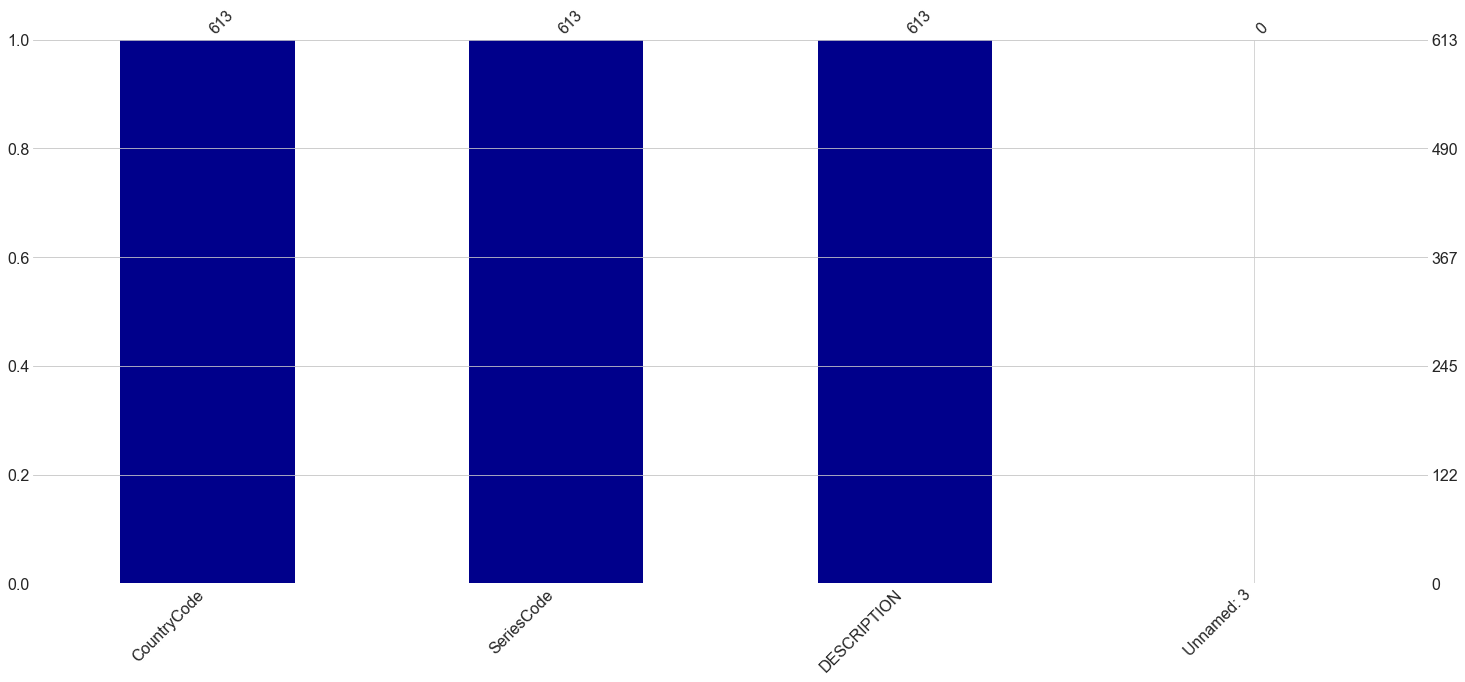

In [13]:
msno.bar(df_CountrySeries, color="darkblue")
plt.show()

Les trois premières colonnes de ce dataset sont entièrement remplies alors que la dernière est complètement vide. La dernière colonne est donc inutile (pas de titre de colonne non plus) et il ne manque pas d'autre information.

In [14]:
df_CountrySeries_dup = df_CountrySeries[df_CountrySeries.duplicated()]
print("Le jeu de données contient", df_CountrySeries_dup.shape[0], "doublon(s).")

Le jeu de données contient 0 doublon(s).


In [15]:
df_CountrySeries.describe() # pas de valeur numérique donc pas de sens

,Unnamed: 3
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


[Retour au sommaire](#Sommaire)

### EdStatsData.csv <a class="anchor" id="Fichier3"></a>

In [16]:
df_Data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ce *DataFrame* nous fournit les valeurs des indicateurs pour chacun des pays pour plusieurs années (comprises entre 1970 et 2100). Ce sera le principal fichier à analyser dans la suite.

In [17]:
print("Le dataset Data possède", df_Data.shape[0], "lignes et", df_Data.shape[1], "colonnes.")

Le dataset Data possède 886930 lignes et 70 colonnes.


In [18]:
df_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

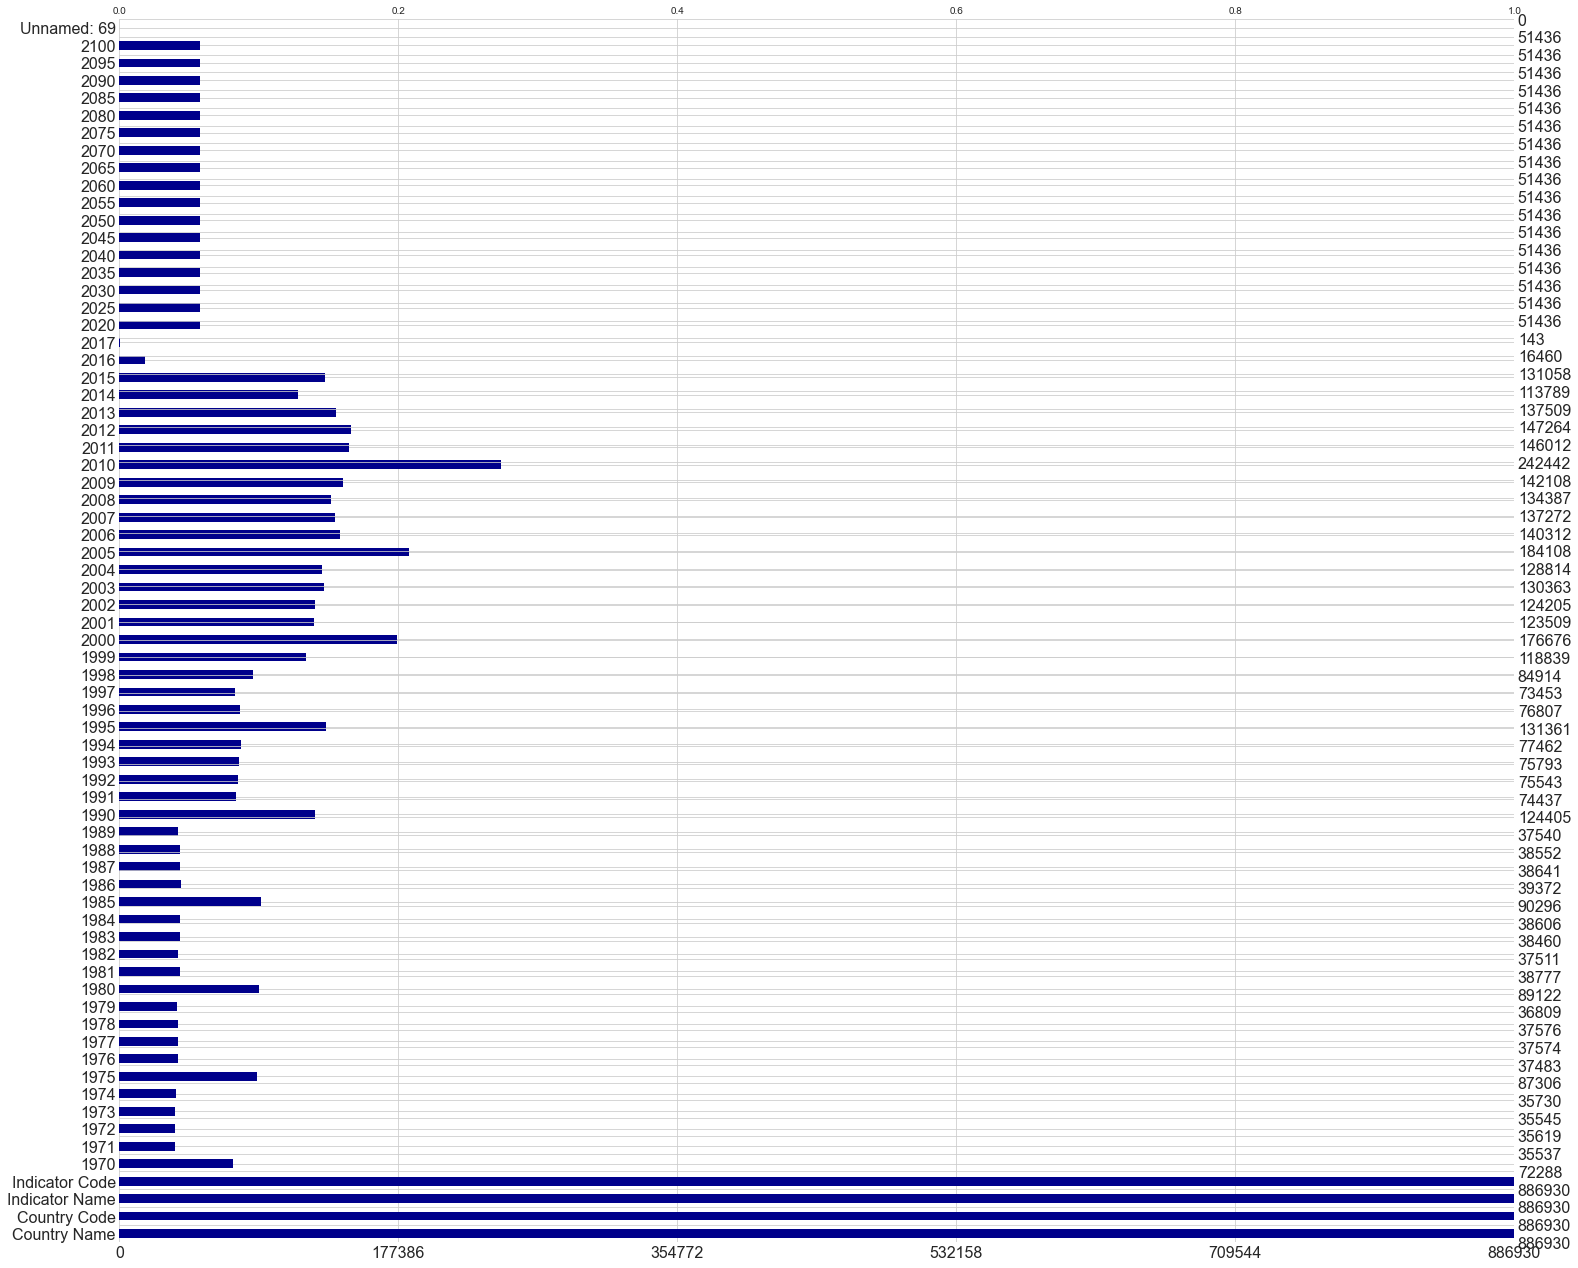

In [19]:
msno.bar(df_Data, color="darkblue")
plt.savefig("HistCompl_Data")
plt.show()

Plusieurs choses sont à noter sur ce jeu de données :
- Les colonnes *Country Name*, *Country Code*, *Indicator Name* et *Indicator Code* sont totalement remplies. C'est une bonne chose : elles permettent de comprendre à quoi correspondent les valeurs des colonnes suivantes.
    
- Presque toutes les autres colonnes ont un taux de complétion inférieur à 20% (et les deux seules colonnes qui ont un taux de complétion supérieur ne sont pas au-dessus de 30%). Ce jeu de données est donc très peu rempli.
    
- Les données vont de l'année 1970 à 2100 avec des données toutes les années entre 1970 et 2017 et des données une fois tous les 5 ans pour les années postérieures à 2020. Nous sommes en 2021 au moment de mon travail donc toutes les données à partir de 2025 ne peuvent pas êtres des données réelles : ce sont des prédictions. Les valeurs pour 2020 sont aussi des prédictions car les données que nous avons recueillies semblent dater d'une année antérieure. Cette hypothèse est confirmée par le fait que toutes les années après 2020 ont exactmeent le même taux de complétion.
    
- Pour les années avant 2020, nous remarquons que les taux de complétion sont tous différents d'une année à l'autre. Plus le temps passe et plus on recueille de données. Nous remarquons aussi que tous les 5 ans (en 1970, 1975, 1980 etc.), il y a beaucoup plus de données que les années proches de celles_ci. En effet, tous les 5 ans, les valeurs données correspondent aux données réelles plus les prédictions. C'est pour cette raison que leur nombre est plus grand.
    
- Pour les années entre 2000 et 2020, les quantités de données sont similaires d'une année à l'autre, sauf pour 2016 et 2017. Voici l'hypothèse avancée : il y a peu de données pour l'année 2016 car le fichier est celui de l'année 2016 donc les données sont en train d'être collectées mais il en manque beaucoup. Pour l'année 2017, celle-ci n'étant pas encore commencée, il n'y a quasiment aucune donnée. L'année de l'étude est donc 2016.

In [20]:
df_Data_dup = df_Data[df_Data.duplicated()]
print("Le jeu de données contient", df_Data_dup.shape[0], "doublon(s).")

Le jeu de données contient 0 doublon(s).


In [21]:
df_Data.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


[Retour au sommaire](#Sommaire)

### EdStatsFootNote.csv <a class="anchor" id="Fichier4"></a>

In [22]:
df_FootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


Ce jeu de données nous indique la provenance des données du jeu de données précédent ou nous explique leur calcul pour chacun des pays, chacun des indicateurs et chacune des années pour lesquelles nous avons une donnée. Nous ne l'utiliserons probablement pas dans notre étude.

In [23]:
print("Le dataset FootNote possède", df_FootNote.shape[0], "lignes et", df_FootNote.shape[1], "colonnes.")

Le dataset FootNote possède 643638 lignes et 5 colonnes.


In [24]:
df_FootNote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


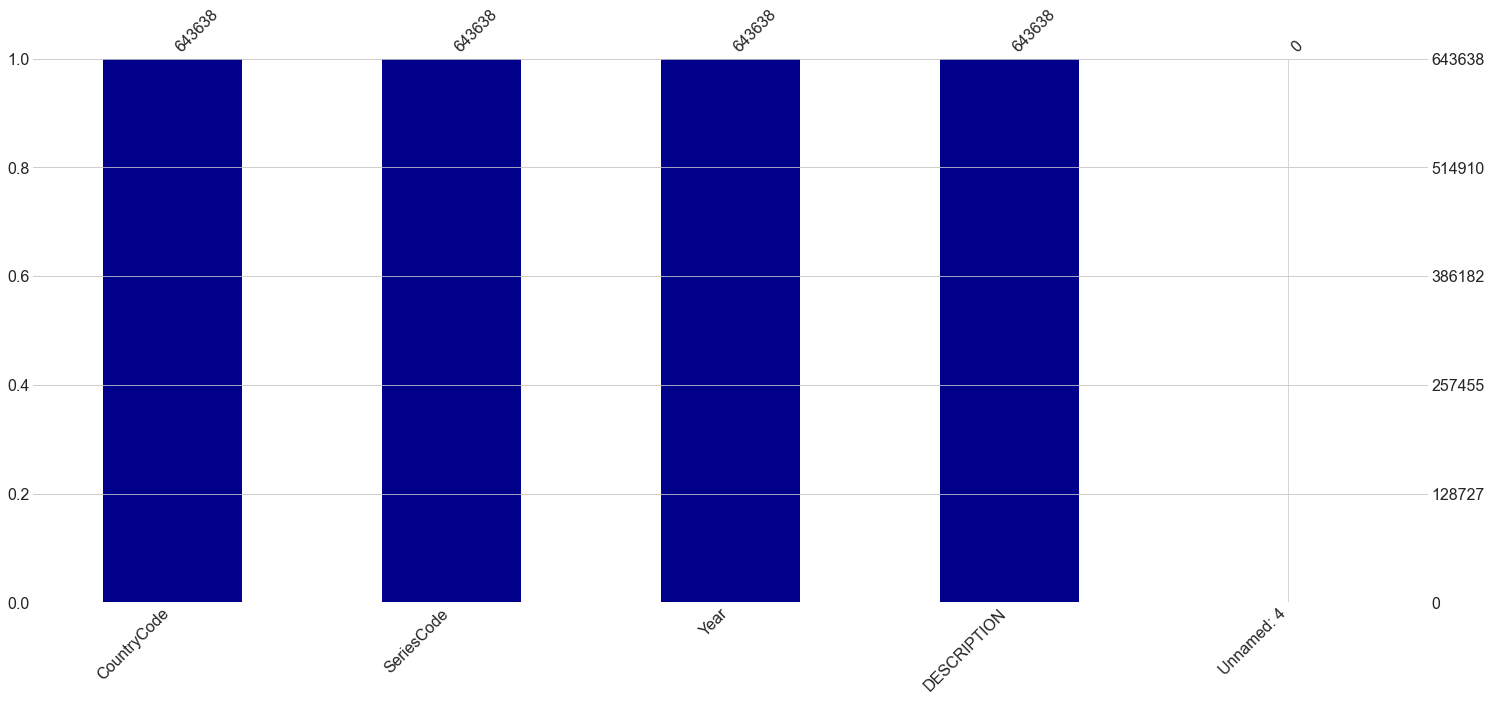

In [25]:
msno.bar(df_FootNote, color="darkblue")
plt.show()

De manière similaire à un précédent fichier, les quatre premières colonnes de ce dataset sont entièrement remplies alors que la dernière est complètement vide. La dernière colonne est donc inutile (pas de titre de colonne non plus) et il ne manque pas d'autre information.

In [26]:
df_FootNote_dup = df_FootNote[df_FootNote.duplicated()]
print("Le jeu de données contient", df_FootNote_dup.shape[0], "doublon(s).")

Le jeu de données contient 0 doublon(s).


In [27]:
df_FootNote.describe()

,Unnamed: 4
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


[Retour au sommaire](#Sommaire)

### EdStatsSeries.csv <a class="anchor" id="Fichier5"></a>

In [28]:
df_Series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ce *DataFrame* permet de décrire plus précisément chacun des indicateurs utilisés dans les précédents jeux de données. Il ne nous sera pas utile dans notre étude.

In [29]:
print("Le dataset Series possède", df_Series.shape[0], "lignes et", df_Series.shape[1], "colonnes.")

Le dataset Series possède 3665 lignes et 21 colonnes.


In [30]:
df_Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

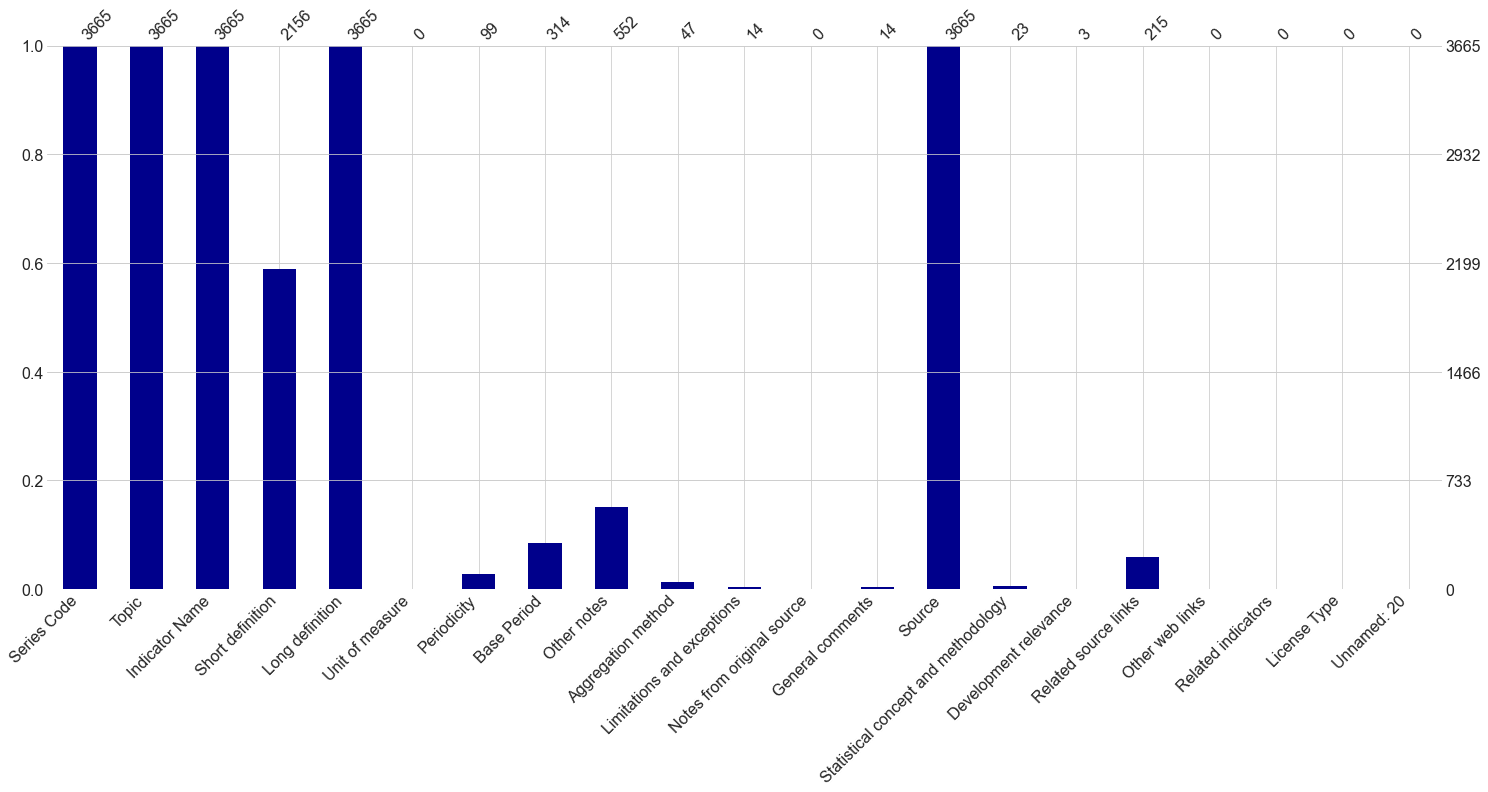

In [31]:
msno.bar(df_Series, color="darkblue")
plt.show()

Les colonnes qui définissent l'indicateur (*Series Code*, *Topic*, *Indicator Name*, etc.) ainsi que la colonne *Source* sont très remplies voire totalement remplies. Les autres colonnes sont très peu remplies. Ce n'est pas très grave puisque nous pouvons mener cette étude sans avoir connaissance de ces informations.

In [32]:
df_Series_dup = df_Series[df_Series.duplicated()]
print("Le jeu de données contient", df_Series_dup.shape[0], "doublon(s).")

Le jeu de données contient 0 doublon(s).


In [33]:
df_Series.describe()

,Unit of measure,Notes from original source,Other web links,Related indicators,License Type,Unnamed: 20
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


[Retour au sommaire](#Sommaire)

## Analyse des données <a class="anchor" id="Partie2"></a>

Avant toute étude, regardons le nombre de pays présents dans la base de données mise à notre disposition.

In [34]:
nombreDePays1 = len(df_Data['Country Name'].unique())
print('On a', nombreDePays1, 'pays dans notre base de données.')

On a 242 pays dans notre base de données.


Nous devons tout d'abord choisir quelques indicateurs à étudier parmi la multitude qui nous sont proposés.

### Sélection des informations pertinentes <a class="anchor" id="Partie2_1"></a>

Nous parcourons l'excel *EdStatsSeries* à la recherche des indicateurs pertinents :
- des indicateurs démographiques
    - BAR.POP.2024 : Population in thousands, age 20-24, total is the total population of 20-24 year olds in thousands estimated by Barro-Lee.
    - BAR.POP.2529 : Population in thousands, age 25-29, total is the total population of 25-29 year olds in thousands estimated by Barro-Lee.
    
- des indicateurs pour l'éducation
    - BAR.SEC.ICMP.2024.ZS : Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary)
    - BAR.SEC.ICMP.2529.ZS : Percentage of population age 25-29 with secondary schooling. Total (Incomplete and Completed Secondary)
    - BAR.TER.ICMP.2024.ZS : Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)
    - BAR.TER.ICMP.2529.ZS : Percentage of population age 25-29 with tertiary schooling. Total (Incomplete and Completed Tertiary)
    
- un indicateur sur la connexion internet
    - IT.NET.USER.P2 : Internet users (per 100 people) (Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.)

- un indicateur économique
    - NY.GDP.PCAP.PP.CD : GDP per capita, PPP (current international en dollars) (Produit intérieur brut par habitant, utilisant la parité de pouvoir d'achat, en "current international" en dollar pour qu'on ne biaise pas les données en comparant des données d'années différentes.)
    
Par la suite, nous combinerons les indicateurs de démographie et d'éducation pour n'en garder qu'un seul par catégorie (1 indicateur démographique et 1 indicateur pour l'éducation).

En plus des indicateurs choisis, nous récupèrerons la région des pays étudiés.

In [35]:
MesIndicateurs = ['BAR.POP.2024', 'BAR.POP.2529', 'BAR.SEC.ICMP.2024.ZS', 'BAR.SEC.ICMP.2529.ZS', 'BAR.TER.ICMP.2024.ZS', 'BAR.TER.ICMP.2529.ZS', 'IT.NET.USER.P2', 'NY.GDP.PCAP.PP.CD']
MonDataset = df_Data[df_Data["Indicator Code"].isin(MesIndicateurs)]

[Retour au sommaire](#Sommaire)

### Construction du dataset d'étude  <a class="anchor" id="Partie2_2"></a>
#### A l'aide du fichier *EdStatsData.csv*...
Pour notre étude de marché, les données de nos indicateurs qui seraient anciennes (années 1970 ou 1980 par exemple) ne nous intéressent pas. Nous souhaitons nous concentrer sur l'état actuel du pays. Nous allons donc garder uniquement les données comprises entre 2010 et 2017.

In [36]:
MonDataset = MonDataset[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']]
MonDataset.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017
392,Arab World,ARB,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.ICMP.2024.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,Arab World,ARB,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.ICMP.2024.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,Arab World,ARB,Barro-Lee: Percentage of population age 25-29 ...,BAR.SEC.ICMP.2529.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
408,Arab World,ARB,Barro-Lee: Percentage of population age 25-29 ...,BAR.TER.ICMP.2529.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
484,Arab World,ARB,"Barro-Lee: Population in thousands, age 20-24,...",BAR.POP.2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ensuite, nous allons chercher, pour chacune des lignes de notre dataset, la valeur la plus récente de notre indicateur. Si aucune donnée n'est disponible entre 2010 et 2017, nous supprimerons le pays.

In [37]:
# 1. Récupérer la valeur le plus récente.
annees = ['2016', '2015', '2014', '2013', '2012', '2011', '2010']
MonDataset['Valeur'] = MonDataset['2017']

for j in range(len(annees)):
    label = annees[j]
    DataNa = MonDataset.loc[MonDataset['Valeur'].isnull()]
    for i in DataNa.index:
        MonDataset['Valeur'][i] = DataNa[label][i]    

C:\Users\charl\AppData\Local\Temp/ipykernel_1180/1541945115.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MonDataset['Valeur'][i] = DataNa[label][i]


In [39]:
# 2. Réorganiser le dataset pour avoir en ligne les pays, en colonne les indicateurs.
MesDonnees = MonDataset
MesDonnees = MesDonnees.pivot(index = 'Country Code', columns = ['Indicator Code', 'Indicator Name'], values = 'Valeur')
MesDonnees.head()

Indicator Code,BAR.SEC.ICMP.2024.ZS,BAR.TER.ICMP.2024.ZS,BAR.SEC.ICMP.2529.ZS,BAR.TER.ICMP.2529.ZS,BAR.POP.2024,BAR.POP.2529,NY.GDP.PCAP.PP.CD,IT.NET.USER.P2
Indicator Name,Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary),Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 25-29 with secondary schooling. Total (Incomplete and Completed Secondary),Barro-Lee: Percentage of population age 25-29 with tertiary schooling. Total (Incomplete and Completed Tertiary),"Barro-Lee: Population in thousands, age 20-24, total","Barro-Lee: Population in thousands, age 25-29, total","GDP per capita, PPP (current international $)",Internet users (per 100 people)
Country Code,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,35973.780510,93.542454
AFG,24.82,8.20,21.30,8.62,3162.0,2583.0,1879.695509,10.595726
AGO,NaN,NaN,NaN,NaN,NaN,NaN,6466.665045,13.000000
ALB,92.14,4.26,90.84,4.77,296.0,255.0,11865.501400,66.363445
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.930637


In [40]:
# 3. Simplifier l'apparence du dataset.
MesDonnees.columns = ['Population avec éducation secondaire, 20-24 ans (%)',
                      'Population avec éducation tertiaire, 20-24 ans (%)',
                      'Population avec éducation secondaire, 25-29 ans (%)',
                      'Population avec éducation tertiaire, 25-29 ans (%)',
                      'Population totale, 20-24 ans (en milliers)',
                      'Population totale, 25-29 ans (en milliers)',
                      'PIB par habitant (en $ PPP)',
                      'Utilisateurs Internet (pour 100 personnes)']
MesDonnees = MesDonnees.reset_index()
MesDonnees.head()

,Country Code,"Population avec éducation secondaire, 20-24 ans (%)","Population avec éducation tertiaire, 20-24 ans (%)","Population avec éducation secondaire, 25-29 ans (%)","Population avec éducation tertiaire, 25-29 ans (%)","Population totale, 20-24 ans (en milliers)","Population totale, 25-29 ans (en milliers)",PIB par habitant (en $ PPP),Utilisateurs Internet (pour 100 personnes)
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,35973.780510,93.542454
1,AFG,24.82,8.20,21.30,8.62,3162.0,2583.0,1879.695509,10.595726
2,AGO,NaN,NaN,NaN,NaN,NaN,NaN,6466.665045,13.000000
3,ALB,92.14,4.26,90.84,4.77,296.0,255.0,11865.501400,66.363445
4,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.930637


A partir des indicateurs démographiques et sur l'éducation dont nous disposons, nous allons créer deux nouveaux indicateurs :
- la population totale, comprise entre 20 et 29 ans, d'un pays,
- le pourcentage de personnes avec éducation dans cette tranche d'âge.

In [41]:
MesDonnees['Population avec éducation, 20-24 ans (en milliers)'] = (MesDonnees['Population avec éducation secondaire, 20-24 ans (%)'] + MesDonnees['Population avec éducation tertiaire, 20-24 ans (%)']) * MesDonnees['Population totale, 20-24 ans (en milliers)'] / 100
MesDonnees['Population avec éducation, 25-29 ans (en milliers)'] = (MesDonnees['Population avec éducation secondaire, 25-29 ans (%)'] + MesDonnees['Population avec éducation tertiaire, 25-29 ans (%)']) * MesDonnees['Population totale, 25-29 ans (en milliers)'] / 100
MesDonnees['Population totale, 20-29 ans (en milliers)'] = MesDonnees['Population totale, 20-24 ans (en milliers)'] + MesDonnees['Population totale, 25-29 ans (en milliers)']
MesDonnees['Population avec éducation, 20-29 ans (en %)'] = (MesDonnees['Population avec éducation, 20-24 ans (en milliers)'] + MesDonnees['Population avec éducation, 25-29 ans (en milliers)']) / MesDonnees['Population totale, 20-29 ans (en milliers)'] * 100
MesDonnees.head()

,Country Code,"Population avec éducation secondaire, 20-24 ans (%)","Population avec éducation tertiaire, 20-24 ans (%)","Population avec éducation secondaire, 25-29 ans (%)","Population avec éducation tertiaire, 25-29 ans (%)","Population totale, 20-24 ans (en milliers)","Population totale, 25-29 ans (en milliers)",PIB par habitant (en $ PPP),Utilisateurs Internet (pour 100 personnes),"Population avec éducation, 20-24 ans (en milliers)","Population avec éducation, 25-29 ans (en milliers)","Population totale, 20-29 ans (en milliers)","Population avec éducation, 20-29 ans (en %)"
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,35973.780510,93.542454,NaN,NaN,NaN,NaN
1,AFG,24.82,8.20,21.30,8.62,3162.0,2583.0,1879.695509,10.595726,1044.0924,772.8336,5745.0,31.626214
2,AGO,NaN,NaN,NaN,NaN,NaN,NaN,6466.665045,13.000000,NaN,NaN,NaN,NaN
3,ALB,92.14,4.26,90.84,4.77,296.0,255.0,11865.501400,66.363445,285.3440,243.8055,551.0,96.034392
4,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.930637,NaN,NaN,NaN,NaN


Nous supprimons maintenant les indicateurs qui ne nous sont plus utiles.

In [42]:
MesDonnees2 = MesDonnees.drop(MesDonnees.columns[[1, 2, 3, 4, 5, 6, 9, 10]], axis=1)
MesDonnees2.head()

,Country Code,PIB par habitant (en $ PPP),Utilisateurs Internet (pour 100 personnes),"Population totale, 20-29 ans (en milliers)","Population avec éducation, 20-29 ans (en %)"
0,ABW,35973.780510,93.542454,NaN,NaN
1,AFG,1879.695509,10.595726,5745.0,31.626214
2,AGO,6466.665045,13.000000,NaN,NaN
3,ALB,11865.501400,66.363445,551.0,96.034392
4,AND,NaN,97.930637,NaN,NaN


In [43]:
Ind_PIB = 'PIB par habitant (en $ PPP)'
Ind_Internet = 'Utilisateurs Internet (pour 100 personnes)'
Ind_Population = 'Population totale, 20-29 ans (en milliers)'
Ind_Education = 'Population avec éducation, 20-29 ans (en %)'

[Retour au sommaire](#Sommaire)

#### ... et du fichier *EdStatsCountry.csv*...
Nous allons récupérer les données qui nous intéressent dans le fichier *EdStatsCountry.csv* :
- le *Country Code* afin de réaliser la jointure entre les deux tableaux par la suite,
- le *Short Name* pour savoir facilement de quel pays il s'agit,
- la *Region* du pays en question.

In [44]:
MesDonnees1 = df_Country[['Country Code', 'Short Name', 'Region']]
MesDonnees1.head()

,Country Code,Short Name,Region
0,ABW,Aruba,Latin America & Caribbean
1,AFG,Afghanistan,South Asia
2,AGO,Angola,Sub-Saharan Africa
3,ALB,Albania,Europe & Central Asia
4,AND,Andorra,Europe & Central Asia


[Retour au sommaire](#Sommaire)

#### Dataset final
Nous rassemblons les données des deux tableaux crées à l'aide d'une jointure puis observons ce nouveau tableau de travail.

In [45]:
DonneesFinales = pd.merge(MesDonnees1, MesDonnees2, left_on='Country Code', right_on='Country Code')
DonneesFinales.head()

,Country Code,Short Name,Region,PIB par habitant (en $ PPP),Utilisateurs Internet (pour 100 personnes),"Population totale, 20-29 ans (en milliers)","Population avec éducation, 20-29 ans (en %)"
0,ABW,Aruba,Latin America & Caribbean,35973.780510,93.542454,NaN,NaN
1,AFG,Afghanistan,South Asia,1879.695509,10.595726,5745.0,31.626214
2,AGO,Angola,Sub-Saharan Africa,6466.665045,13.000000,NaN,NaN
3,ALB,Albania,Europe & Central Asia,11865.501400,66.363445,551.0,96.034392
4,AND,Andorra,Europe & Central Asia,NaN,97.930637,NaN,NaN


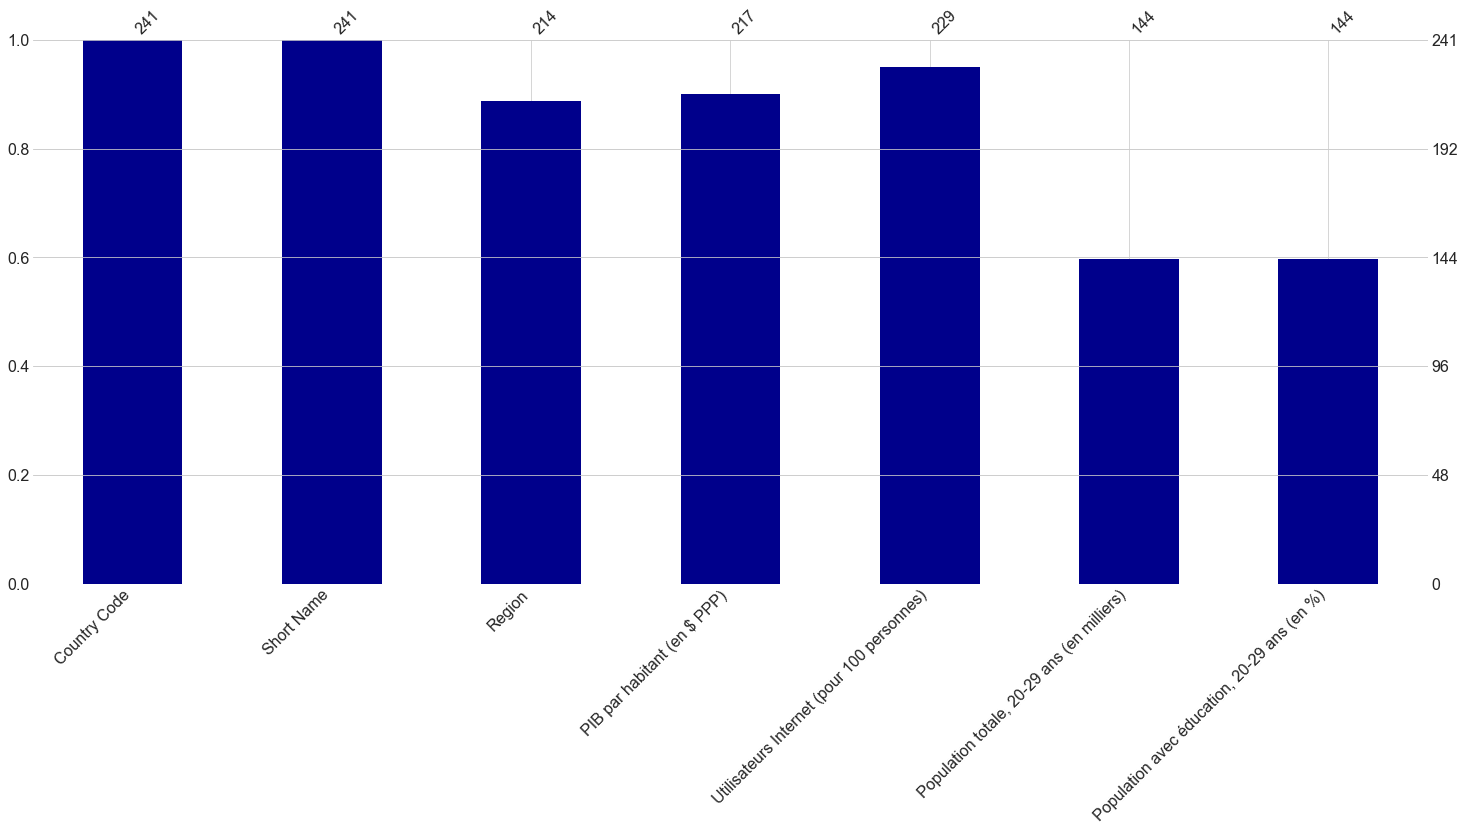

In [46]:
msno.bar(DonneesFinales, color="darkblue")
plt.show()

In [47]:
DonneesFinales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 240
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Country Code                                 241 non-null    object 
 1   Short Name                                   241 non-null    object 
 2   Region                                       214 non-null    object 
 3   PIB par habitant (en $ PPP)                  217 non-null    float64
 4   Utilisateurs Internet (pour 100 personnes)   229 non-null    float64
 5   Population totale, 20-29 ans (en milliers)   144 non-null    float64
 6   Population avec éducation, 20-29 ans (en %)  144 non-null    float64
dtypes: float64(4), object(3)
memory usage: 15.1+ KB


In [48]:
# Supprimons les pays qui ont des valeurs manquantes.
DonneesFinales = DonneesFinales.dropna()

Après avoir supprimé les pays qui ont des valeurs maquantes pour les indicateurs sélectionnés, regardons combien de pays il nous reste.

In [49]:
nombreDePays2 = len(DonneesFinales['Country Code'].unique())
print('Il nous reste', nombreDePays2, 'pays dans notre base de données (', nombreDePays1 - nombreDePays2, 'pays supprimés à cette étape).')

Il nous reste 142 pays dans notre base de données ( 100 pays supprimés à cette étape).


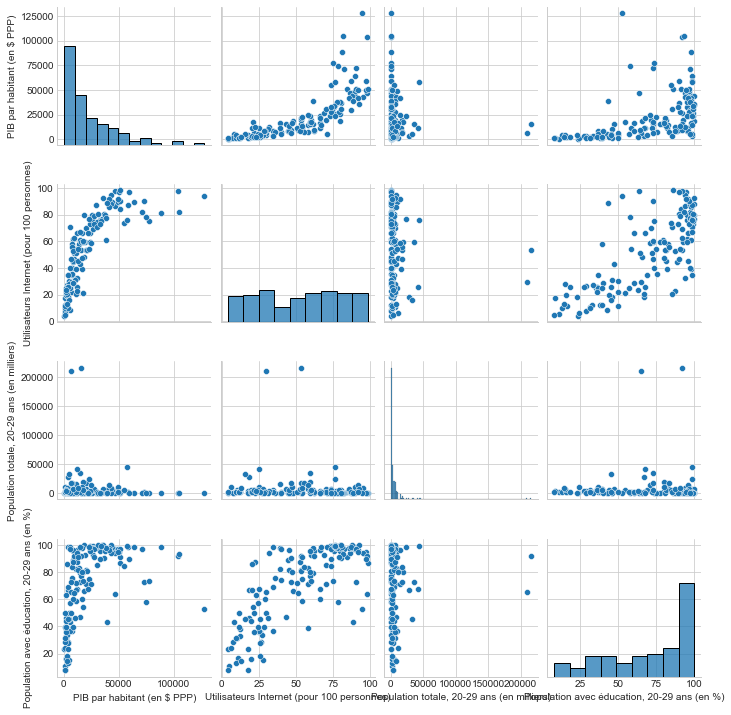

In [50]:
sns.pairplot(DonneesFinales, height=2.5);

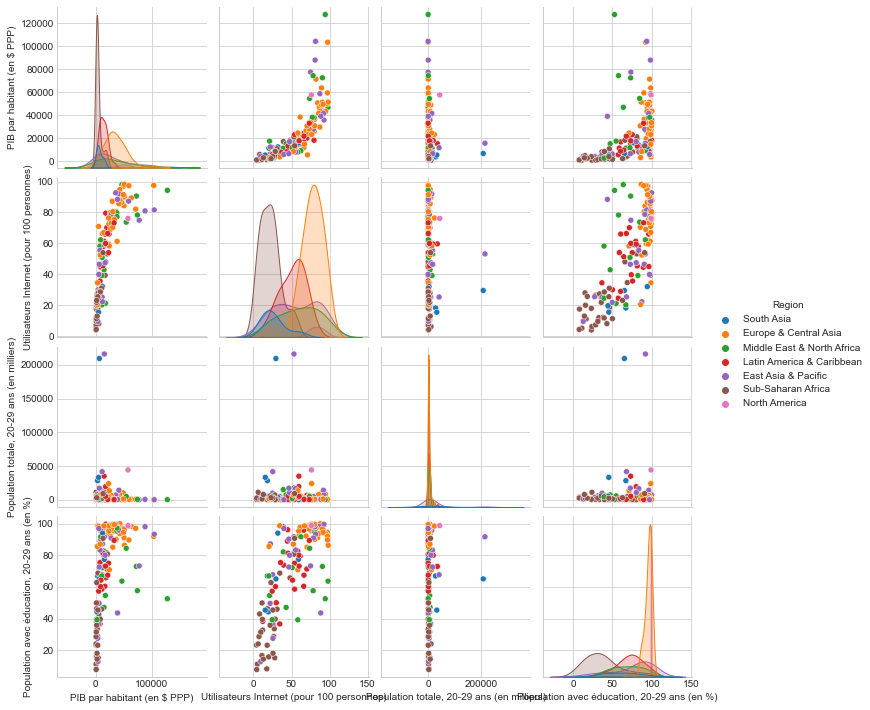

In [51]:
sns.pairplot(DonneesFinales, hue='Region', height=2.5);

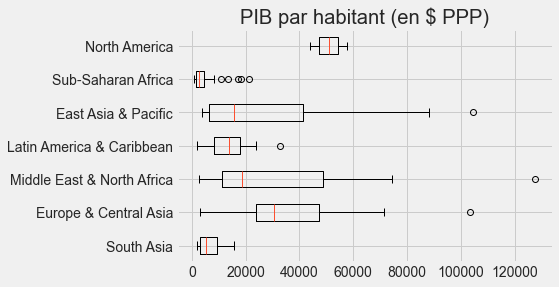

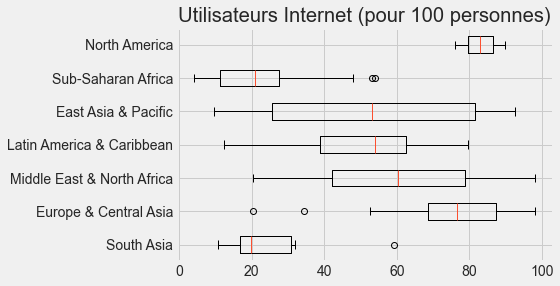

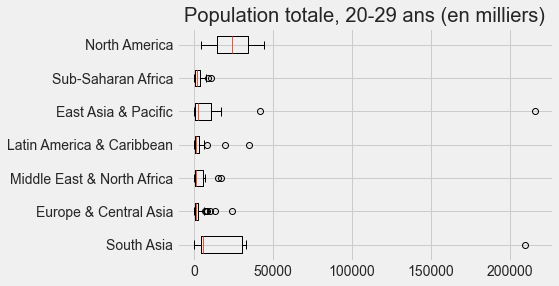

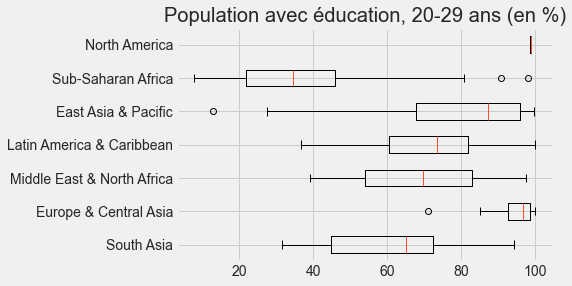

In [52]:
for column in DonneesFinales.select_dtypes(exclude='object'):
    regions = DonneesFinales['Region'].unique()
    groupes = []
    for r in regions:
        groupes.append(DonneesFinales[DonneesFinales['Region']==r][column])
    plt.style.use('fivethirtyeight')
    plt.figure()
    plt.title(column)
    plt.boxplot(groupes, labels=regions, vert=False)

In [53]:
DonneesFinales.describe()

,PIB par habitant (en $ PPP),Utilisateurs Internet (pour 100 personnes),"Population totale, 20-29 ans (en milliers)","Population avec éducation, 20-29 ans (en %)"
count,142.000000,142.000000,142.000000,142.000000
mean,22452.458329,52.460250,7490.781690,70.711811
std,23476.018239,27.965119,25743.096605,27.488175
min,700.063083,4.000000,18.000000,7.777937
25%,5269.874041,25.594207,582.750000,46.429128
50%,14883.756783,54.031462,1528.000000,80.087694
75%,32833.963603,76.720300,5598.750000,95.547925
max,127727.965544,98.240016,215921.000000,100.000000


[Retour au sommaire](#Sommaire)

## Choix des pays à fort et bon potentiel <a class="anchor" id="Partie3"></a>
Nous devons choisir un critère afin de sélectionner les pays à fort et bon potentiels. Nous allons choisir, pour les pays à fort potentiel, ceux dont tous la valeur des indicateurs choisis sont supérieures au troisième quartile.
Les pays à bon potentiel seront ceux dont la valeur de l'indicateur qui concerne internet est supérieure au troisième quartile (car il semble vraiment important d'avoir une bonne connexion à internet pour suivre des cours en ligne) et la valeur des autres indicateurs choisis sont supérieures au deuxième quartile.

In [54]:
PIB_75 = DonneesFinales[Ind_PIB].quantile(q=0.75)
Internet_75 = DonneesFinales[Ind_Internet].quantile(q=0.75)
Pop_75 = DonneesFinales[Ind_Population].quantile(q=0.75)
Edu_75 = DonneesFinales[Ind_Education].quantile(q=0.75)

PIB_50 = DonneesFinales[Ind_PIB].quantile(q=0.50)
Pop_50 = DonneesFinales[Ind_Population].quantile(q=0.50)
Edu_50 = DonneesFinales[Ind_Education].quantile(q=0.50)

[Retour au sommaire](#Sommaire)

### Pays à fort potentiel <a class="anchor" id="Partie3_1"></a>

In [55]:
Pays_Fort_Potentiel = DonneesFinales[(DonneesFinales[Ind_PIB] >= PIB_75) &
                                     (DonneesFinales[Ind_Internet] >= Internet_75) &
                                     (DonneesFinales[Ind_Population] >= Pop_75) &
                                     (DonneesFinales[Ind_Education] >= Edu_75)]

In [56]:
Pays_Fort_Potentiel.head(Pays_Fort_Potentiel.shape[0])

,Country Code,Short Name,Region,PIB par habitant (en $ PPP),Utilisateurs Internet (pour 100 personnes),"Population totale, 20-29 ans (en milliers)","Population avec éducation, 20-29 ans (en %)"
51,DEU,Germany,Europe & Central Asia,48884.762872,89.647101,10196.0,96.939686
71,FRA,France,Europe & Central Asia,41466.265711,85.622200,7727.0,97.693515
107,JPN,Japan,East Asia & Pacific,41476.360298,92.000000,14189.0,95.951363
114,KOR,Korea,East Asia & Pacific,35750.769977,92.716545,6926.0,99.624906


[Retour au sommaire](#Sommaire)

### Pays à bon potentiel <a class="anchor" id="Partie3_2"></a>

In [57]:
Pays_Bon_Potentiel = DonneesFinales[(DonneesFinales[Ind_PIB] >= PIB_50) &
                                    (DonneesFinales[Ind_Internet] >= Internet_75) &
                                    (DonneesFinales[Ind_Population] >= Pop_50) &
                                    (DonneesFinales[Ind_Education] >= Edu_50)]
Pays_Bon_Potentiel = Pays_Bon_Potentiel[(~Pays_Bon_Potentiel['Country Code'].isin(Pays_Fort_Potentiel['Country Code']))]

In [58]:
Pays_Bon_Potentiel.head(Pays_Bon_Potentiel.shape[0])

,Country Code,Short Name,Region,PIB par habitant (en $ PPP),Utilisateurs Internet (pour 100 personnes),"Population totale, 20-29 ans (en milliers)","Population avec éducation, 20-29 ans (en %)"
11,AUS,Australia,East Asia & Pacific,46789.927238,88.238658,2978.0,96.681330
33,CAN,Canada,North America,44025.183426,89.840000,4577.0,98.597072
65,ESP,Spain,Europe & Central Asia,36462.111778,80.561333,5349.0,90.140910
75,GBR,United Kingdom,Europe & Central Asia,43080.956403,94.775801,8151.0,93.796775
108,KAZ,Kazakhstan,Europe & Central Asia,25331.285303,76.800000,2817.0,97.495382
156,MYS,Malaysia,East Asia & Pacific,27736.349310,78.788310,4611.0,90.969375
163,NLD,Netherlands,Europe & Central Asia,51319.518152,90.410959,1938.0,96.632693


Nous avons donc trouvé 4 pays à fort potentiel : l'Allemagne, la France, le Japon et la Corée. La France apparaît dans la liste des pays à fort potentiels mais ce ne sera pas un pays cible pour l'expansion de l'entreprise puisque déjà présente en France.
Nous observons aussi 7 pays à bon potentiel dans lesquels il pourrait être intéressant de s'implanter.

[Retour au sommaire](#Sommaire)

## Evolution des indicateurs <a class="anchor" id="Partie4"></a>
Dans la suite, nous allons suivre l'évolution des indicateurs choisis dans les pays à for potentiel afin de s'assurer que les pays choisis présentent un réel intérêt.
Pour cela, nous devons récupérer les données brutes (donc sur plusieurs années) du fichier *EdStatsData.csv* pour les pays et les indicateurs concernés.

In [59]:
Evolution_Fort_Potentiel = df_Data[(df_Data['Country Code'].isin(Pays_Fort_Potentiel['Country Code'])) &
                        (df_Data['Indicator Code'].isin(MesIndicateurs))]
Evolution_Fort_Potentiel.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
337572,France,FRA,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.ICMP.2024.ZS,32.58,NaN,NaN,NaN,NaN,37.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337574,France,FRA,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.ICMP.2024.ZS,14.97,NaN,NaN,NaN,NaN,15.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337586,France,FRA,Barro-Lee: Percentage of population age 25-29 ...,BAR.SEC.ICMP.2529.ZS,21.62,NaN,NaN,NaN,NaN,32.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337588,France,FRA,Barro-Lee: Percentage of population age 25-29 ...,BAR.TER.ICMP.2529.ZS,10.75,NaN,NaN,NaN,NaN,14.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337664,France,FRA,"Barro-Lee: Population in thousands, age 20-24,...",BAR.POP.2024,4117.00,NaN,NaN,NaN,NaN,4247.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
def plot_evolution_ind(NomInd, IndCode, df, liste_pays):
    df2 = df[df['Indicator Code'] == IndCode]
    df2 = df2.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code']).T
    df2.columns = liste_pays
    df2 = df2.drop(df2.index[0])
    
    df2.plot(y = liste_pays)
    plt.xlabel("Année")
    plt.ylabel(NomInd)
    plt.show()

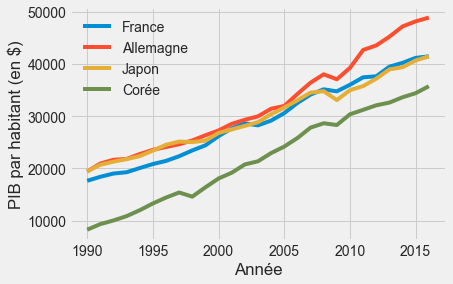

In [61]:
plot_evolution_ind("PIB par habitant (en $)", 'NY.GDP.PCAP.PP.CD', Evolution_Fort_Potentiel, ['France', 'Allemagne', 'Japon', 'Corée'])

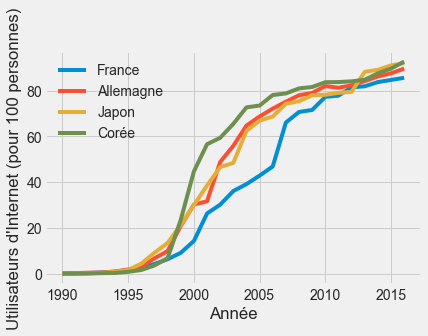

In [62]:
plot_evolution_ind("Utilisateurs d'Internet (pour 100 personnes)", 'IT.NET.USER.P2', Evolution_Fort_Potentiel, ['France', 'Allemagne', 'Japon', 'Corée'])

Pour chacun des pays et pour chaque année, nous devons retrouver la valeur des indicateurs que nous avions composés à partir d'autres indicateurs.

In [63]:
Indicateurs = ['BAR.POP.2024', 'BAR.POP.2529', 'BAR.SEC.ICMP.2024.ZS', 'BAR.SEC.ICMP.2529.ZS', 'BAR.TER.ICMP.2024.ZS', 'BAR.TER.ICMP.2529.ZS']
Evolution = Evolution_Fort_Potentiel[Evolution_Fort_Potentiel['Indicator Code'].isin(Indicateurs)]
EvolutionFrance = Evolution[Evolution['Country Code'] == 'FRA']
EvolutionAllemagne = Evolution[Evolution['Country Code'] == 'DEU']
EvolutionJapon = Evolution[Evolution['Country Code'] == 'JPN']
EvolutionCoree = Evolution[Evolution['Country Code'] == 'KOR']

In [64]:
def creer(CountryCode, df0):
    df = df0[df0['Country Code'] == CountryCode].drop(columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']).T
    df.columns = ['Population avec éducation secondaire, 20-24 ans (%)',
                      'Population avec éducation tertiaire, 20-24 ans (%)',
                      'Population avec éducation secondaire, 25-29 ans (%)',
                      'Population avec éducation tertiaire, 25-29 ans (%)',
                      'Population totale, 20-24 ans (en milliers)',
                      'Population totale, 25-29 ans (en milliers)']
    df = df.dropna()
    df['Annee'] = df.index
    df['Population avec éducation, 20-24 ans (en milliers)'] = (df['Population avec éducation secondaire, 20-24 ans (%)'] + df['Population avec éducation tertiaire, 20-24 ans (%)']) * df['Population totale, 20-24 ans (en milliers)'] / 100
    df['Population avec éducation, 25-29 ans (en milliers)'] = (df['Population avec éducation secondaire, 25-29 ans (%)'] + df['Population avec éducation tertiaire, 25-29 ans (%)']) * df['Population totale, 25-29 ans (en milliers)'] / 100
    df['Population totale, 20-29 ans (en milliers)'] = df['Population totale, 20-24 ans (en milliers)'] + df['Population totale, 25-29 ans (en milliers)']
    df['Population avec éducation, 20-29 ans (en %)'] = (df['Population avec éducation, 20-24 ans (en milliers)'] + df['Population avec éducation, 25-29 ans (en milliers)']) / df['Population totale, 20-29 ans (en milliers)'] * 100
    df = df.reset_index()
    df = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 8, 9]], axis=1)
    return df

In [65]:
EvolutionFrance = creer('FRA', Evolution)
EvolutionAllemagne = creer('DEU', Evolution)
EvolutionJapon = creer('JPN', Evolution)
EvolutionCoree = creer('KOR', Evolution)

In [66]:
Evolution1 = pd.merge(EvolutionFrance, EvolutionAllemagne, on='Annee', suffixes = ('_FRA', '_ALL'))
Evolution2 = pd.merge(EvolutionJapon, EvolutionCoree, on='Annee', suffixes = ('_JAP', '_COR'))
Evolution3 = pd.merge(Evolution1, Evolution2, on='Annee')
Evolution3.head(Evolution3.shape[0])

,Annee,"Population totale, 20-29 ans (en milliers)_FRA","Population avec éducation, 20-29 ans (en %)_FRA","Population totale, 20-29 ans (en milliers)_ALL","Population avec éducation, 20-29 ans (en %)_ALL","Population totale, 20-29 ans (en milliers)_JAP","Population avec éducation, 20-29 ans (en %)_JAP","Population totale, 20-29 ans (en milliers)_COR","Population avec éducation, 20-29 ans (en %)_COR"
0,1970,7159.0,41.099719,10170.0,22.632212,19812.0,67.973915,4847.0,51.488777
1,1975,8525.0,50.245164,10496.0,36.830183,19868.0,78.100000,5604.0,61.353176
2,1980,8476.0,43.621944,11587.0,44.072340,17039.0,84.838050,7222.0,75.956314
3,1985,8521.0,63.139825,12699.0,50.954146,16002.0,92.620000,8350.0,87.329880
4,1990,8598.0,74.430914,13317.0,70.163885,16886.0,92.880571,8565.0,96.512474
5,1995,8340.0,82.269881,11710.0,78.422742,18689.0,93.593658,8589.0,98.908523
6,2000,7944.0,91.859060,9546.0,77.637706,18521.0,94.734800,8167.0,99.493108
7,2005,7698.0,97.133507,9561.0,93.759325,16170.0,95.831269,7517.0,99.500531
8,2010,7727.0,97.693515,10196.0,96.939686,14189.0,95.951363,6926.0,99.624906


In [67]:
EvolutionEdu = Evolution3[Evolution3.columns[[0, 2, 4, 6, 8]]]
EvolutionEdu.columns = ['Année', 'France', 'Allemagne', 'Japon', 'Corée']
EvolutionEdu.head()

,Année,France,Allemagne,Japon,Corée
0,1970,41.099719,22.632212,67.973915,51.488777
1,1975,50.245164,36.830183,78.100000,61.353176
2,1980,43.621944,44.072340,84.838050,75.956314
3,1985,63.139825,50.954146,92.620000,87.329880
4,1990,74.430914,70.163885,92.880571,96.512474


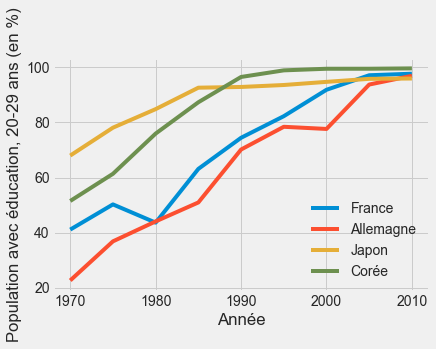

In [68]:
EvolutionEdu.plot(x = 'Année', y = ['France', 'Allemagne', 'Japon', 'Corée'])
plt.xlabel("Année")
plt.ylabel("Population avec éducation, 20-29 ans (en %)")
plt.show()

In [69]:
EvolutionPop = Evolution3.drop(Evolution3.columns[[2, 4, 6, 8]], axis=1)
EvolutionPop.columns = ['Année', 'France', 'Allemagne', 'Japon', 'Corée']
EvolutionPop.head()

,Année,France,Allemagne,Japon,Corée
0,1970,7159.0,10170.0,19812.0,4847.0
1,1975,8525.0,10496.0,19868.0,5604.0
2,1980,8476.0,11587.0,17039.0,7222.0
3,1985,8521.0,12699.0,16002.0,8350.0
4,1990,8598.0,13317.0,16886.0,8565.0


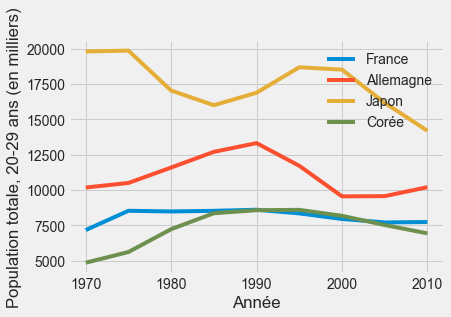

In [70]:
EvolutionPop.plot(x = 'Année', y = ['France', 'Allemagne', 'Japon', 'Corée'])
plt.xlabel("Année")
plt.ylabel("Population totale, 20-29 ans (en milliers)")
plt.show()

Les trois premiers indicateurs ont une tendance croissante au fil des années dans tous les pays à fort potentiel. C'est un bon signe si l'on décide de s'implanter au sein de ces pays. Cependant, le dernier indicateur, qui montre la population entre 20 et 29 ans ne présente pas cette tendance.
- En Allemagne, la population de cette tranche d'âge est en légère augmentation depuis 2000.
- En Corée, la population est en légère baisse.
- Au Japon, la population est plus grande mais en plus grande baisse.

Malgré cela, ces trois pays seront ceux dans lesquels l'entreprise doit opérer en premier.

[Retour au sommaire](#Sommaire)

### Note annexe <a class="anchor" id="Note"></a>

In [71]:
print('Le fichier Country contenait', len(df_Country['Country Code'].unique()), 'pays.')
print('Le fichier Data contenait', len(df_Data['Country Code'].unique()), 'pays.')

Le fichier Country contenait 241 pays.
Le fichier Data contenait 242 pays.


Il y a un pays qui est présent dans le fichier *EdStatsData.csv* mais pas dans *EdStatsCountry.csv*. Regardons rapidement de quel pays il s'agit et si des informations ont pu nous échapper

In [72]:
pays_manquant = df_Data[~df_Data['Country Code'].isin(df_Country['Country Code'].unique())]
print(pays_manquant['Country Name'].unique())

['British Virgin Islands']


In [73]:
pays_manquant_ind = pays_manquant[pays_manquant['Indicator Code'].isin(MesIndicateurs)]
pays_manquant_ind = pays_manquant_ind.dropna(how='all', axis=1)
pays_manquant_ind.head(pays_manquant_ind.shape[0])

,Country Name,Country Code,Indicator Name,Indicator Code
190972,British Virgin Islands,VGB,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.ICMP.2024.ZS
190974,British Virgin Islands,VGB,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.ICMP.2024.ZS
190986,British Virgin Islands,VGB,Barro-Lee: Percentage of population age 25-29 ...,BAR.SEC.ICMP.2529.ZS
190988,British Virgin Islands,VGB,Barro-Lee: Percentage of population age 25-29 ...,BAR.TER.ICMP.2529.ZS
191064,British Virgin Islands,VGB,"Barro-Lee: Population in thousands, age 20-24,...",BAR.POP.2024
191068,British Virgin Islands,VGB,"Barro-Lee: Population in thousands, age 25-29,...",BAR.POP.2529
191827,British Virgin Islands,VGB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD
191955,British Virgin Islands,VGB,Internet users (per 100 people),IT.NET.USER.P2


Finalement, ce pays n'apportait aucune information intéressante pour les indicateurs choisis.

[Retour au sommaire](#Sommaire)

In [74]:
DonneesFinales.head()

,Country Code,Short Name,Region,PIB par habitant (en $ PPP),Utilisateurs Internet (pour 100 personnes),"Population totale, 20-29 ans (en milliers)","Population avec éducation, 20-29 ans (en %)"
1,AFG,Afghanistan,South Asia,1879.695509,10.595726,5745.0,31.626214
3,ALB,Albania,Europe & Central Asia,11865.501400,66.363445,551.0,96.034392
6,ARE,United Arab Emirates,Middle East & North Africa,72540.205858,90.600007,1000.0,73.001160
7,ARG,Argentina,Latin America & Caribbean,19978.640971,70.150764,6586.0,71.378105
8,ARM,Armenia,Europe & Central Asia,8849.910837,62.000000,573.0,95.503438


In [75]:
DonneesFinales['Population avec éducation, 20-29 ans (en %)'].mean()

70.71181060358433

In [76]:
DonneesFinales.groupby('Region')['Population avec éducation, 20-29 ans (en %)'].mean()

Region
East Asia & Pacific           75.566653
Europe & Central Asia         94.667526
Latin America & Caribbean     72.052752
Middle East & North Africa    68.694291
North America                 98.727292
South Asia                    60.688705
Sub-Saharan Africa            38.025816
Name: Population avec éducation, 20-29 ans (en %), dtype: float64

In [77]:
DonneesFinales['Utilisateurs Internet (pour 100 personnes)'].mean()

52.46025023971124

In [78]:
Pays_Fort_Potentiel.head()

,Country Code,Short Name,Region,PIB par habitant (en $ PPP),Utilisateurs Internet (pour 100 personnes),"Population totale, 20-29 ans (en milliers)","Population avec éducation, 20-29 ans (en %)"
51,DEU,Germany,Europe & Central Asia,48884.762872,89.647101,10196.0,96.939686
71,FRA,France,Europe & Central Asia,41466.265711,85.622200,7727.0,97.693515
107,JPN,Japan,East Asia & Pacific,41476.360298,92.000000,14189.0,95.951363
114,KOR,Korea,East Asia & Pacific,35750.769977,92.716545,6926.0,99.624906


In [79]:
Pays_Fort_Potentiel['Population avec éducation, 20-29 ans (en milliers)'] = Pays_Fort_Potentiel['Population totale, 20-29 ans (en milliers)'] * Pays_Fort_Potentiel['Population avec éducation, 20-29 ans (en %)'] / 100
Pays_Fort_Potentiel['Utilisateurs Internet, 20-29 ans (en milliers)'] = Pays_Fort_Potentiel['Population totale, 20-29 ans (en milliers)'] * Pays_Fort_Potentiel['Utilisateurs Internet (pour 100 personnes)'] / 100

C:\Users\charl\AppData\Local\Temp/ipykernel_1180/444868058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pays_Fort_Potentiel['Population avec éducation, 20-29 ans (en milliers)'] = Pays_Fort_Potentiel['Population totale, 20-29 ans (en milliers)'] * Pays_Fort_Potentiel['Population avec éducation, 20-29 ans (en %)'] / 100
C:\Users\charl\AppData\Local\Temp/ipykernel_1180/444868058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pays_Fort_Potentiel['Utilisateurs Internet, 20-29 ans (en milliers)'] = P

In [80]:
DonneesFinales['PIB par habitant (en $ PPP)'].mean()

22452.458328500248

In [81]:
DonneesFinales['PIB par habitant (en $ PPP)'].mean() / DonneesFinales['PIB par habitant (en $ PPP)'].max()

0.17578341777332848

In [82]:
DonneesFinales.groupby('Region')['Population totale, 20-29 ans (en milliers)'].mean()

Region
East Asia & Pacific           16634.285714
Europe & Central Asia          2954.250000
Latin America & Caribbean      4200.958333
Middle East & North Africa     4292.375000
North America                 24367.000000
South Asia                    40801.000000
Sub-Saharan Africa             2886.218750
Name: Population totale, 20-29 ans (en milliers), dtype: float64

In [83]:
Evolution3.head(Evolution3.shape[0])

,Annee,"Population totale, 20-29 ans (en milliers)_FRA","Population avec éducation, 20-29 ans (en %)_FRA","Population totale, 20-29 ans (en milliers)_ALL","Population avec éducation, 20-29 ans (en %)_ALL","Population totale, 20-29 ans (en milliers)_JAP","Population avec éducation, 20-29 ans (en %)_JAP","Population totale, 20-29 ans (en milliers)_COR","Population avec éducation, 20-29 ans (en %)_COR"
0,1970,7159.0,41.099719,10170.0,22.632212,19812.0,67.973915,4847.0,51.488777
1,1975,8525.0,50.245164,10496.0,36.830183,19868.0,78.100000,5604.0,61.353176
2,1980,8476.0,43.621944,11587.0,44.072340,17039.0,84.838050,7222.0,75.956314
3,1985,8521.0,63.139825,12699.0,50.954146,16002.0,92.620000,8350.0,87.329880
4,1990,8598.0,74.430914,13317.0,70.163885,16886.0,92.880571,8565.0,96.512474
5,1995,8340.0,82.269881,11710.0,78.422742,18689.0,93.593658,8589.0,98.908523
6,2000,7944.0,91.859060,9546.0,77.637706,18521.0,94.734800,8167.0,99.493108
7,2005,7698.0,97.133507,9561.0,93.759325,16170.0,95.831269,7517.0,99.500531
8,2010,7727.0,97.693515,10196.0,96.939686,14189.0,95.951363,6926.0,99.624906
